# CHSH demo

This notebook contains a demo of a circuit preparing a Bell state to test the CHSH inequality. 
It shows how to use the Sampler and Estimator features in Qiskit.

In this demo the features are used with the simulator, but the Sampler and Estimator features both work with the real IBM quantum systems too.

In [1]:
# Imports

from IPython.display import display
from math import sqrt
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

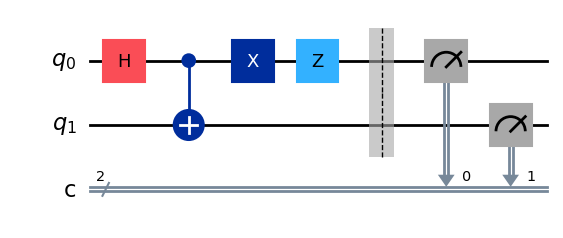

In [5]:
q = [q0, q1] = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)
circuit.h(q0)
circuit.cx(q0, q1)
circuit.x(q0)
circuit.z(q0)
circuit.barrier()
circuit.measure(q, c)

display(circuit.draw('mpl'))

# Sampler

The cell below runs the circuit using the Sampler and shows the resulting frequencies.

The results are an equal mix of 00 and 11, showing that the qubits are entangled.

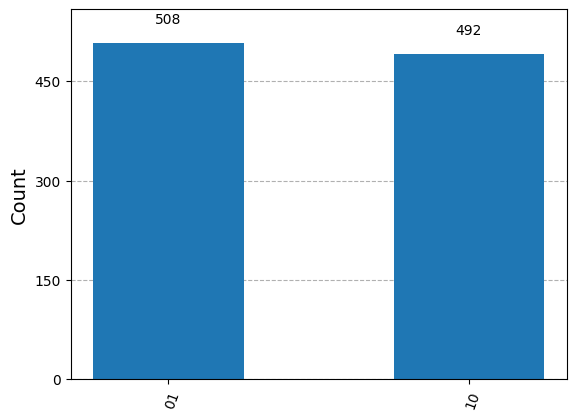

In [ ]:
simulator = AerSimulator()
sampler = Sampler(simulator)
job = sampler.run([circuit], shots=1000)
result = job.result()
counts = result[0].data.c.get_counts() # Note: 'c' here is from the name given to the classical register
plot_histogram(counts)                 # This plot uses the simple plot_histogram function from Qiskit. You can instead extract the data and do whatever you want with it.

# Estimator

The cell below runs a variant of the circuit using the Estimator, and calculates the expectation of $C=\sqrt{2}(Z_1Z_0+X_1X_0)$.

In [4]:
q = [q0, q1] = QuantumRegister(2, 'q')
circuit = QuantumCircuit(q)
circuit.h(q0)
circuit.cx(q0, q1)
circuit.x(q0)
circuit.z(q0)
c = SparsePauliOp.from_list([("ZZ", sqrt(2)), ("XX", sqrt(2))])
estimator = StatevectorEstimator()
pub = (circuit, [[c]])
job = estimator.run(pubs=[pub])
result = job.result()
estimate = result[0].data.evs[0]
print(estimate)


[-2.82842712]
